# The Computing Challenge 2022 / 2023

This year the Computing Challenge revolves around writing a code to study a modified version of a model called the [''random sequential adsorption model''](https://en.wikipedia.org/wiki/Random_sequential_adsorption). This model is used to study the pattern formed by particles that irreversibly deposit on a surface (in other words, once they stick, they cannot be removed). In particular, you will be asked to write a code to do a set of simulations to solve the following problem:



## Problem description / Rules of the game

You have to compare three systems: 
- A monodisperse (single-size) mixture of particles with the shape of a disk with radius $R_1 = \frac{1}{\sqrt{\pi}}$
- A bidisperse mixture with 50% disks of radius $R_1 = \sqrt{\frac{3}{2\pi}}$ and 50% disks of radius $R_2 = \sqrt{\frac{1}{2\pi}}$
- An additional bidisperse mixture where 80% of the disks have radius $R_1 = \sqrt{\frac{15}{16\pi}}$ and 20% have radius $R_2 = \sqrt{\frac{5}{4\pi}}$

Note that the *average* area of the circular base of the disk in all three mixtures is the same, and equal to 1 (you can check!).

Let these disks deposit onto a flat, square surface of size $L=20$ (see more later), *with two constraints*: 

> 1) **Two disks can overlap, but only partially**. We will deem an overlap acceptable if the distance $d$ between the centres of the two disks is $d> \alpha (R_i + R_j)$, with $\alpha < 1.0$, where $R_i$ and $R_j$ are the radii of the two disks.

> 2) **All disks have to reside completely within the deposition surface**. In other words, it is not acceptable for a disk to be partially outside the boundary of the square.

**Note**: we will assume that, when depositing, a disk will simply lie flat on the surface (and thus their thickness will be irrelevant for our problem).
**Note2**: The units of measures are irrelevant for this problem, and are thus not specified.

## The Question

**Which of the 3 different mixtures can better occupy the available space? In other words, which mixture maximises the ratio of the area occupied by the disks to that of the surface on which they deposit?**

This problem belongs to the class of so-called [*packing problems*](https://en.wikipedia.org/wiki/Packing_problems), which have important applications when considering maximising the **storage of material**, maximising the exposed area given a certain amount of volume in a **catalyst** (think why!), and many various other applications, definitely not limited to Materials Science.

In order to answer this question, you will have to implement a few algorithms using what you learned in Python. Let us explore them in more detail in the next part.


### Algorithm 1: Generating a random sample of adsorbed particles

The code you need to write will take as input a certain integer number $N$, and give as output a valid adsorption pattern of these particles, **following this procedure**:

> 1) For a given mixture, pick a particle with the right probability based on the mixture composition. Example: for a 20%:80% $R_1:R_2$ mixture, you will need to use a procedure that, for a large number of trials, picks $R_1$ 20% of the time, and $R_2$ 80% of the time.

> 2) Pick a random position inside the square. This position will be the position of the centre of your disk.

> 3) If the disk is entirely inside the square and it does not overlap with any other previously deposited disk, then this is a valid position for the disk and is recorded, otherwise this potential adsortion event is rejected. Note that to check this you will need to compare the position of your disk with all other disks deposited in previous steps!

> 4) Repeat points 1-3 until you *tried* to deposit $N$ particles. By this we mean that every time that you try to deposit one particle, this trial is counted, regardless of whether or not the deposition was accepted as valid or not.

Note that every time you run this algorithm, different configurations will be generated and for this reasons this is called a stochastic algorithm. When doing this kind of simulations, you need to **look at the average results over many repetitions** to obtain a statistically correct answer. Thus, you should prepare the code so that a full simulation can be repeated $N_{\rm rep}$ number of times, where $N_{\rm rep}$ is a number to be decided (see more later).

#### 2) Measuring the packing fraction of the disks via Monte Carlo simulations

Once you generate a single configuration of the system by repeating points 1-4, you need to estimate the packing fraction of the disks, that is, the ratio between the area occupied by the disks and the total area of the deposition surface. If no overlap was allowed, this number could be calculated exactly: it would be simply the number of each disk multiplied by each disk area and divided by the area of the deposition surface. 

However, this is not the case here (think why, but remember that some overlap is allowed...and this will be not always the same!) and we will need to resort to a simple form of a [Monte Carlo estimation](https://en.wikipedia.org/wiki/Monte_Carlo_method). In practice, the algorithm you need to implement does the following:

> 1) Choose a random point inside the square delimiting your deposition area.

> 2) If the random point is inside any of the disks, count it as ''valid''. 

> 3) Repeat points 1 & 2 for $N_{\rm sample}$ times, where $N_{\rm sample}$ is an integer number that is input by the user.

It can be proven mathematically (but if you think about it, it does make sense!) that **the ratio of the areas occupied by the disks and the total area** of the depositing surface converges ($N_{\rm sample}\rightarrow\infty$ to the **fraction of points that have been counted as valid**, in other words $N_{\rm valid}/N_{\rm sample}$. We will use our approximate estimate using a final number of sample as our "official estimate" for the packing fraction of the disks. A similar algorithm can and has been used to calculate [the value of $\pi$](https://en.wikipedia.org/wiki/Monte_Carlo_method), and more generally integrals over many dimensions.

## Answering the question

Note that the answer to the question *might* depend on the number of particles $N$ that we *try to* deposit on the surface, as well as on the allowed overlap as determined by the $\alpha$ parameter. Thus, you are asked to provide a plot displaying results as a function of these two parameters. In particular, you need to provide a 4 plots, each of which reports the packing fraction $f$ as a function of $\alpha$ for $\alpha \in [0.4,0.6,0.7,0.8,0.9,1.0]$, for $N=50,100,200,400$. For all these previous simulations, you can use $N_{\rm rep}=10$ and $N_{\rm sample}=200$.

Note that the **statistical accuracy** of your estimate for the packing fraction depends on $N_{\rm rep}$ and $N_{\rm sample}$. The accuracy is calculated as the mean-square root deviation of the measured packing fraction over the different configurations generated. Thus, for the case of $\alpha = 0.8$ and $N=400$ only, you should also measure this accuracy. For all the combinations of parameters ($N_{\rm rep},$N_{\rm sample}) for $N_{\rm rep}=10, 20, 40, 80$ and $N_{\rm sample} \in [100,200,400]$, and report them in a table.

### A little help

Checking if the code works can be facilitated by drawing a figure and check that all is as expected. For example, any valid configuration should not have overlapping circles or circles crossing the boundaries of the deposition surface. **Visualising what happens in the system can be of great help!** In your case, you can do that, for example, by adapting the following piece of code to your necessities (the code prints circles of a given radius and at a give position). *You do not need to do it but it might be helpful for you*


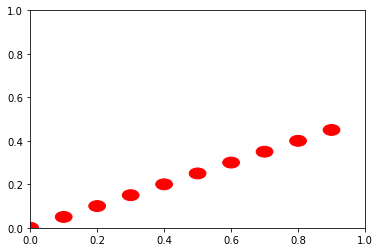

In [1]:
#Check what this piece of code does!

import matplotlib.pyplot as plt

fig = plt.gcf() #Defines a figure object
ax = fig.gca() #Defines an axis object

for i in range(10):
    x = 0.1 * i
    y = 0.05 * i
    # The following adds red circles at position x,y of radius 0.025
    ax.add_patch( plt.Circle(( x, y ), radius=0.025, color = "red" ) ) 
                                            

plt.show()


### Some remarks:

- There is not a single solution in terms of how to structure the code. 

- Try to structure the code using classes to build a hierarchical approach to the problem. For example, you might define a class "configuration", that takes as input the number of trials $N$. This class might have an internal generate method that generates a list of disks in allowed positions, and then another method to calculate the value of the packing fraction for that configuration. This "configuration"object might then be inserted in a larger "simulation" object and so on. But there are various ways to do the same, all equally valid!

- It is good practice to test each sub-part of the code independently to check that it works as an isolated unit before assembling them together. This will make sure that if there is a problem (because, for example, you obtain a nonsensical output), you know where it is, which makes it easier to correct it. 


**NOTE**: *there is not a single recipe for doing this and you will have to experiment a bit*. However, if you do not coordinate initially within the group, it will be much harder to combine all the various parts later, especially because the input for one part of the code is the output for another, and they have to blend together efficiently.

## How to do it: "Divide & Conquer"

When you are about to solve a problem using a computational approach, there are a few steps typically involved. Some are related to how to face a complex problem in general, others to the fact that you should be doing that as a group and not alone.  
The general approach I would suggest you to use is the so-called "Divide and Conquer" approach, the (somewhat wrong) English translation of the ancient Romans motto [*Divide et Impera*](https://en.wikipedia.org/wiki/Divide_and_rule). In practice, the idea is to apply a centuries-old military strategy, whose philosophy can be simplified in this words: **When a problem seems to big to be tackled, first decompose it in smaller, simpler parts**. In this way, these smaller subparts can be more easily solved, one by one, and then re-assembled them together to find the solution of the initial problem. This is a general strategy that might be used in many situations and is **very common when dealing with complex scientific problems**.  

Let us translate this strategy into practical steps:

1. First, **read the whole text of the problem once all together**.
2. Read it a second time, to **identify the different subparts in which it can be split**. Ideally, you want each person in the group to code the solution for one of these blocks. 
3. Before each person starts to write code for their subproblem, it is important that you **coordinate together within the group and decide first which are the inputs and which are the outputs needed for each block, and their format**. This step is usually helped by starting to write the solution as pseudo-code, i.e., as a series of instructions, without worrying to use the correct synthax of the Python language (or for that matter any programming language you might wish to use). 

**Example of Pseudo-code** - for making a ["Tiramisu", a delicious Italian dessert](https://www.youtube.com/watch?v=87V4nizNJiE) 
1. Prepare the cream [INPUT: eggs whites, egg yolks, mascarpone, sugar; INSTRUMENT: mixer; OUTPUT: cream]
2. Prepare the Lady Fingers (a type of biscuits) [INPUT: biscuits, coffee, rum; INSTRUMENT: coffee machine; OUTPUT: basis for the tiramisu]
3. Assemble the cream and Lady Fingers together and top with cocoa [INPUT: Cream, Lady Fingers, Cocoa powder; INSTRUMENT: Hands OUTPUT: Tiramisu]
4. Enjoy & Eat!

### Marking criteria

1. Correct use of functions and their implementation, as well as correct use of the data types introduced in the lectures. **20 out of 100 Marks** 
2. Correct use of the control flow constructs introduced in the lectures. **20 out of 100 Marks** 
3. Use of the appropriate numpy functionalities. For example, you should avoid to re-code something that is already present in the library for you (at least if it is something we have seen in the course!). **20 out of 100 Marks** 
4. The code implements the various steps in a way that traslates this problem into the correct algorithm to solve it **20 out of 100 Marks** 
5. The output of the code is correct **10 out of 100 Marks** 
6. The style of coding is neat and allow for external users to easily read and understand the code. For example, all functions (whether isolated functions or methods attribute of a class) have a proper documentation / are commented to describe what is their input and output. The various algorithms should also contain commentsto describe the most salient steps they implement, and so on **10 out of 100 Marks**.


## Files requested for Submission on BlackBoard

You need to submit the following files:

> 1) The code implementing all the algorithms above

> 2) The plots requested in the **Answering the Question** section and a Table with the measured accuracy

> 3) Three "configuration files" reporting the position of the disks generated for three configuration of the system (of your choice). 

The files should look something like this:
- $R_1$ $x_1$ $y_1$
- $R_2$ $x_2$ $y_2$
- ...  ...      ...
- $R_M$ $x_M$ $y_M$

where $R_i$ is the radius of particle $i$, and $x_i$ and $y_i$ are the x and y position of particle $i$. You can call these files "$\alpha-N.txt$", so that one can check for which value of $\alpha$ and $N$ it was generated. 

Provide the code as a single Jupyter Notebook or separate files, configuration files as .txt files and plots in any format you want. 

For organisational reasons, **each single student must submit these files via Blackboard**, within the deadline provided in the Student Handbook. Note that this means that exactly the same code will be submitted by the people in the same group. Also, note that this is a group effort and there will be one single mark for the whole group, because all members will be considered equally responsible for the delivery of the whole final product. 